In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os 

os.chdir(r"C:\Users\akhan")
print(os.getcwd())
warnings.filterwarnings(action='ignore')

C:\Users\akhan


In [2]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [3]:
import statsmodels.api as sm

In [4]:
from sklearn.linear_model import LogisticRegression

## Step 1. Reading, Understanding and Visualizing the data

In [6]:
# Import  Application data

df=pd.read_csv(r'C:\Users\akhan\FilesForPython\Leads.csv')
pd.set_option("display.max_columns", None)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
df.shape

(9240, 37)

In [9]:
100*df.isnull().mean()

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

## Step 2: Data Preparation

In [11]:
df_org = df

### Drop columns Prospect ID, Lead Number, Country
df = df.drop(['Prospect ID', 'Lead Number', 'Country'], axis=1)

In [12]:
df.shape

(9240, 34)

In [13]:
df_org.shape

(9240, 37)

In [14]:
## Replace 'Select with NaN to identify if the column is having high % of null
colWithSelect = ['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']
df[colWithSelect] = df[colWithSelect].replace('Select', np.nan)

In [15]:
100*df.isnull().mean()

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.0000

In [16]:
## remove columne 'How did you hear about X Education', 'Lead Profile' since they have high nulls

df = df.drop(['How did you hear about X Education', 'Lead Profile'], axis=1)


In [17]:
df.shape

(9240, 32)

In [18]:
## Drop other columns having more than 37% blanks
df = df.drop(['City', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score', 'Lead Quality'], axis=1)

In [19]:
df.shape

(9240, 26)

In [20]:
100*df.isnull().mean()

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.000000
X Education Forums                                0.000000
Newspaper                                         0.0000

## Impute numerical columns with median and categorical columns with mode
Categorical Columns: 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags'
Numerical Columns: 'TotalVisits', 'Page Views Per Visit'

In [22]:
cat_cols = ['Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags']
num_cols = ['TotalVisits', 'Page Views Per Visit']


In [23]:
for col in num_cols:   
    med = df[col].median()      
    df[col]=df[col].fillna(med)

In [24]:
for col in cat_cols:  
    mod = df[col].mode()[0]
    df[col]=df[col].fillna(mod)


In [25]:
100*df.isnull().mean()

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

In [26]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


In [27]:
df.shape

(9240, 26)

### Step 3: EDA

In [29]:
## Univariate Analysis

In [30]:
cat_cols = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 
'What is your current occupation', 'What matters most to you in choosing a course', 'Tags',  'Search', 'Magazine', 
'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations',
'Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content',
'I agree to pay the amount through cheque','A free copy of Mastering The Interview', 'Last Notable Activity']

num_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

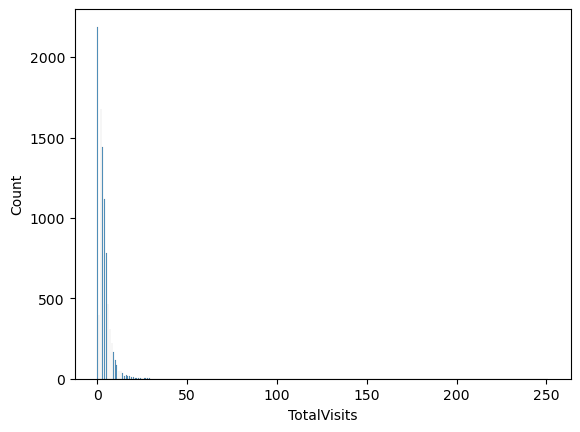

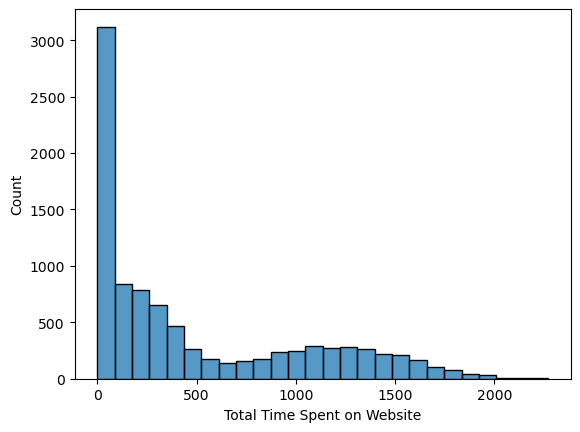

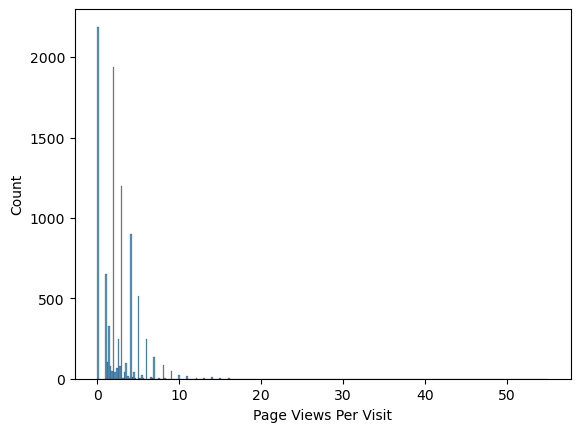

In [31]:
# Univariate Analysis of Numeric Variables

for i in num_cols:
    sns.histplot(x=df[i])
    plt.show()

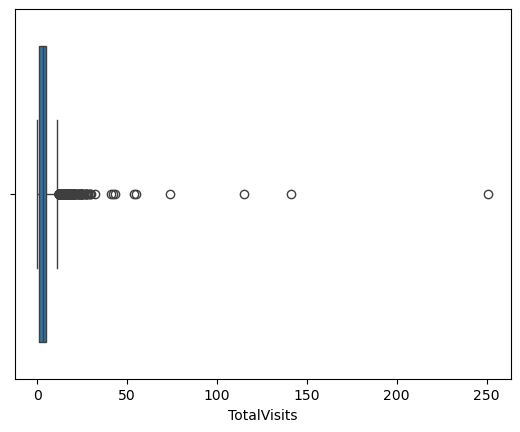

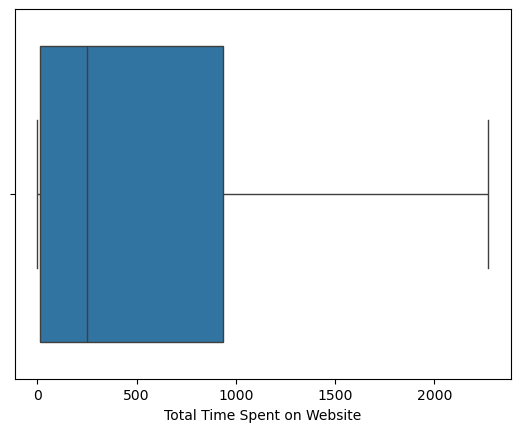

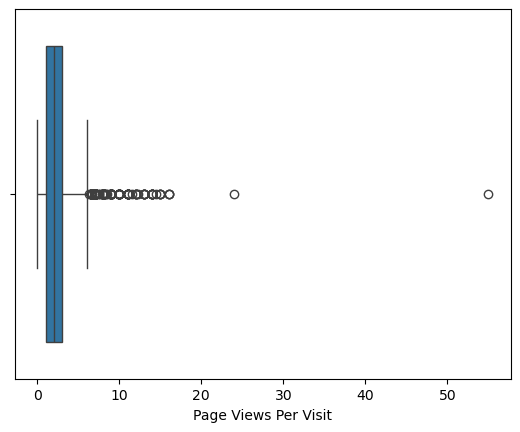

In [32]:
# Boxplot for Numerical columns ---> It shows outliers and quartile (median) distribution
for col in num_cols:              # plot graph for all num_cols
    sns.boxplot(x = df[col])
    plt.show()

### Page Views Per Visit and Total Visits have outliers and they are on the upper whisker
Impute Outliers using capping and flooring method

In [34]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.357440
std,0.486714,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [35]:
for col in num_cols:
    q1 = df[col].describe()["25%"]
    q3 = df[col].describe()["75%"]
    iqr = q3-q1
    lw = q1 - 1.5*iqr
    uw = q3 + 1.5*iqr
    df[col] = np.where(df[col] > uw, uw, df[col])
    df[col] = np.where(df[col] < lw, lw, df[col])

In [36]:
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.217424,487.698268,2.255105
std,0.486714,2.860471,548.021466,1.779471
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,11.000000,2272.000000,6.000000


In [37]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0.0,0.0,Page Visited on Website,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674.0,2.5,Email Opened,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428.0,1.0,Converted to Lead,Finance Management,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,No,No,Modified


# Univariate Analysis of Numeric Variables

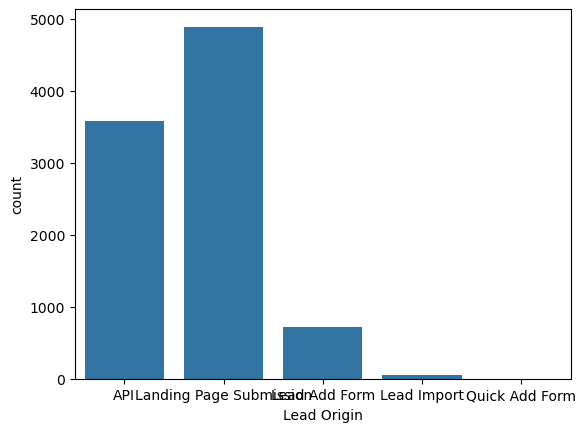

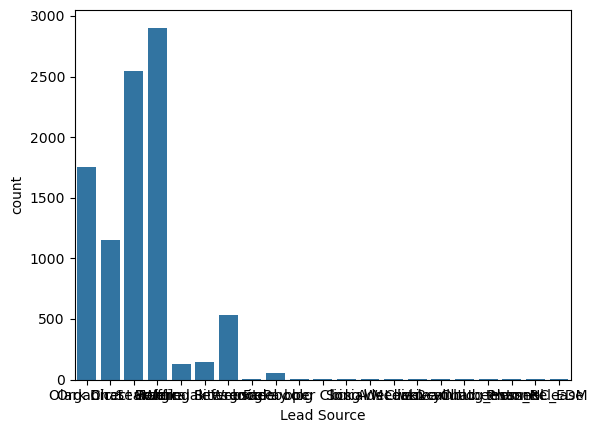

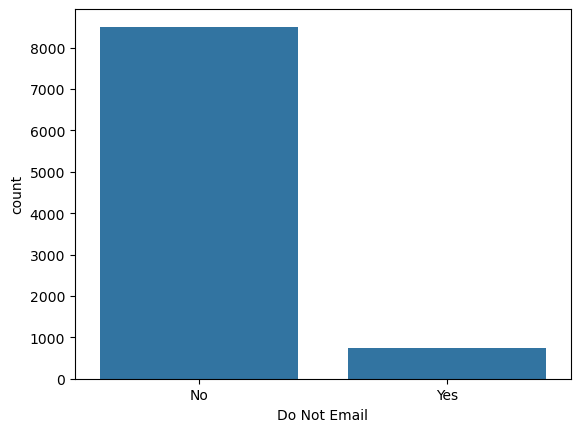

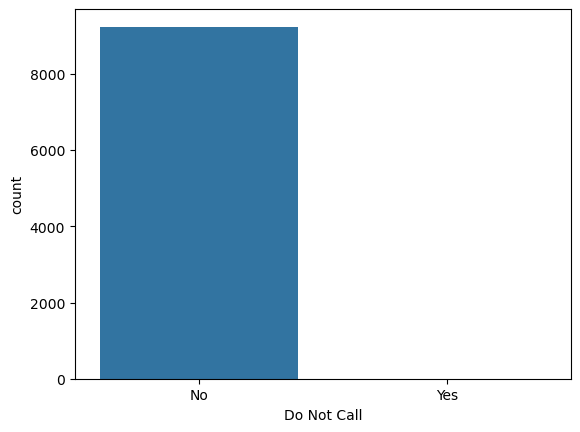

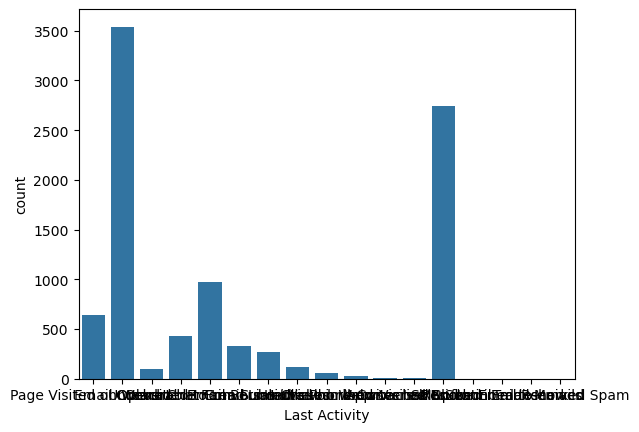

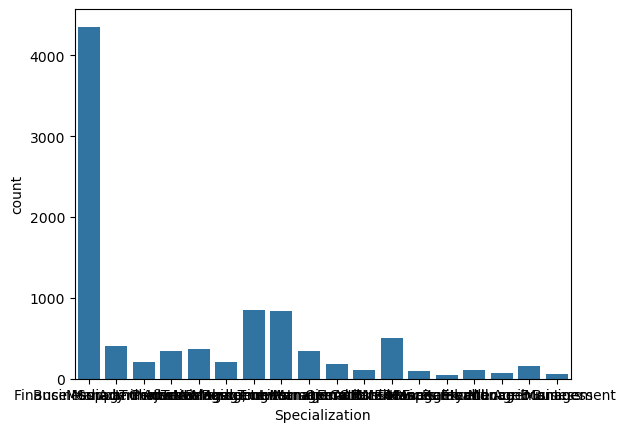

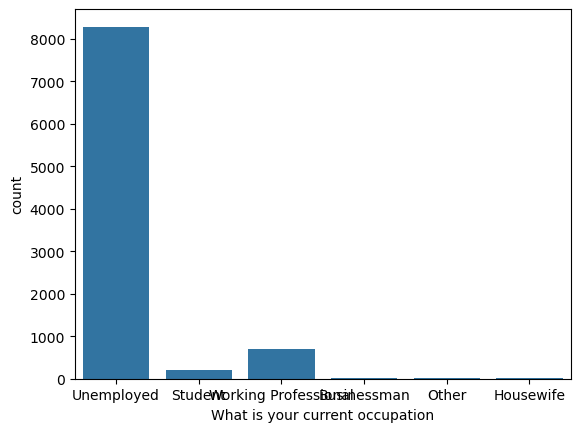

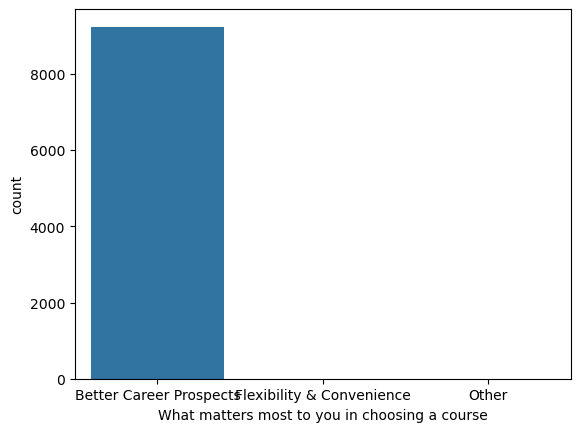

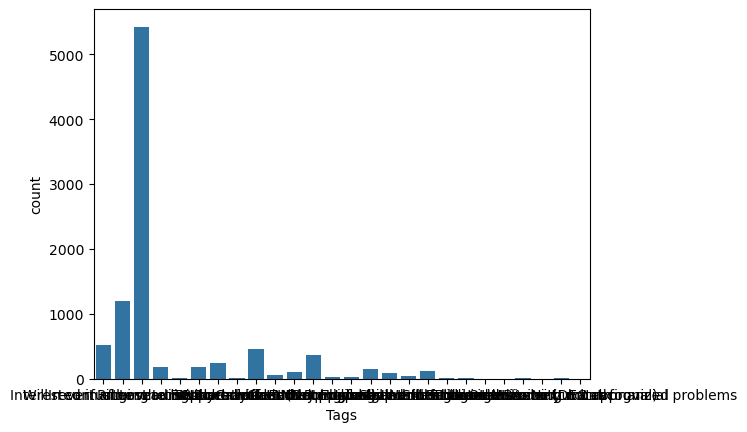

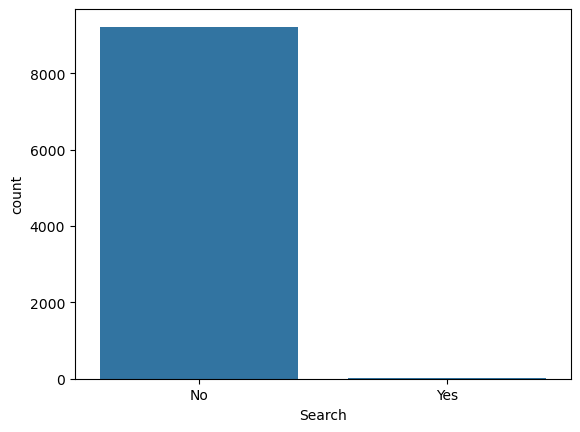

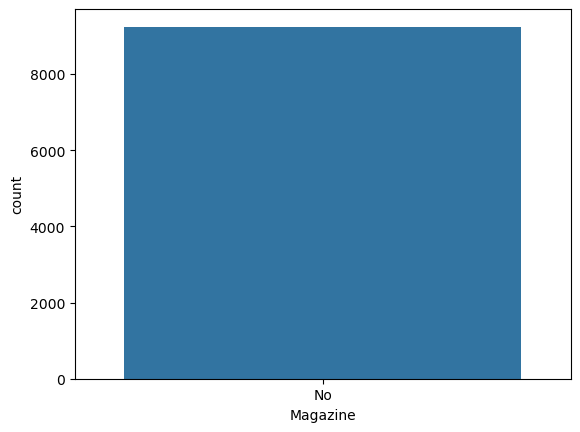

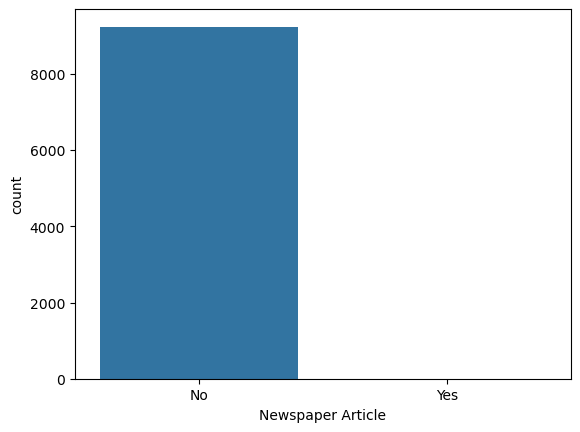

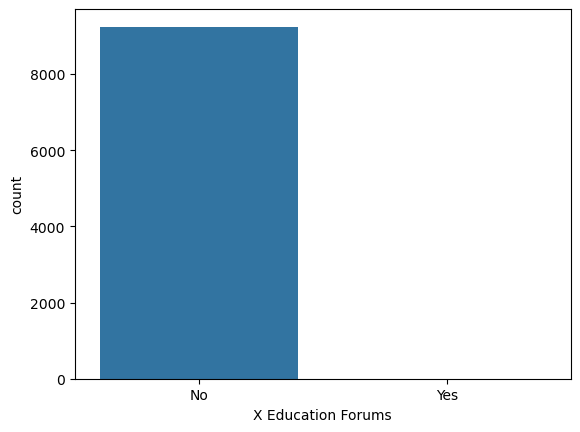

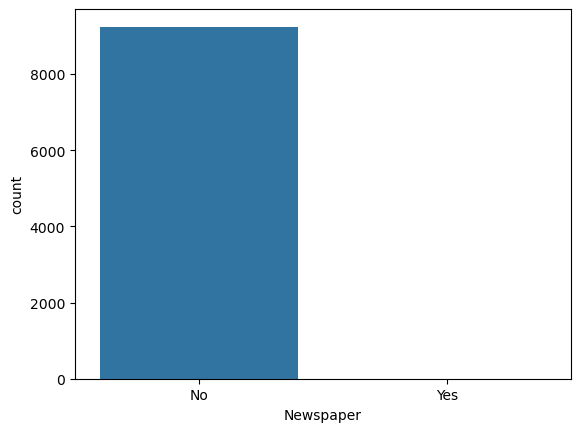

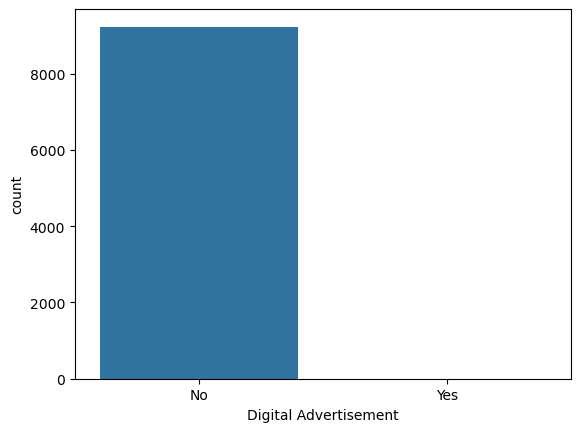

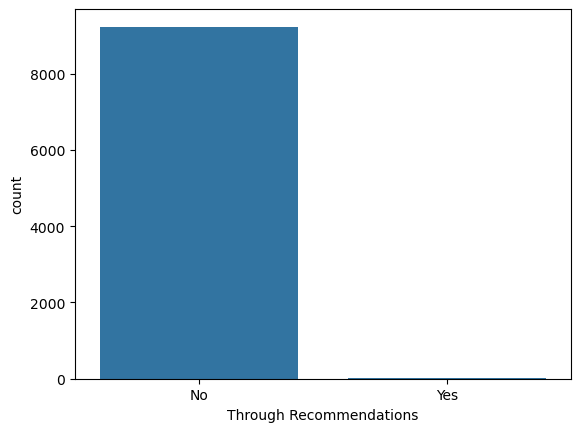

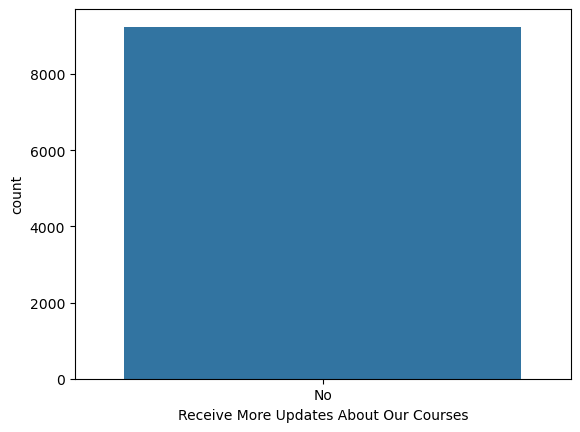

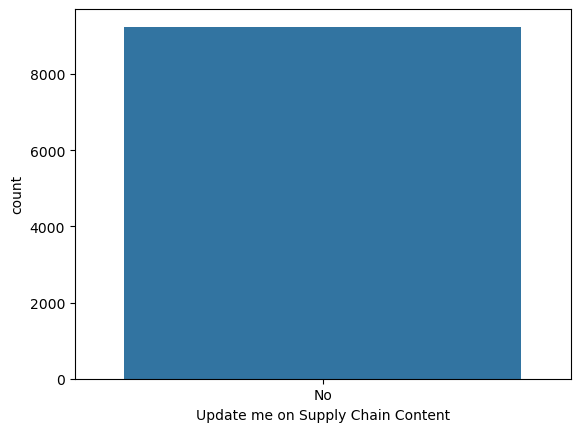

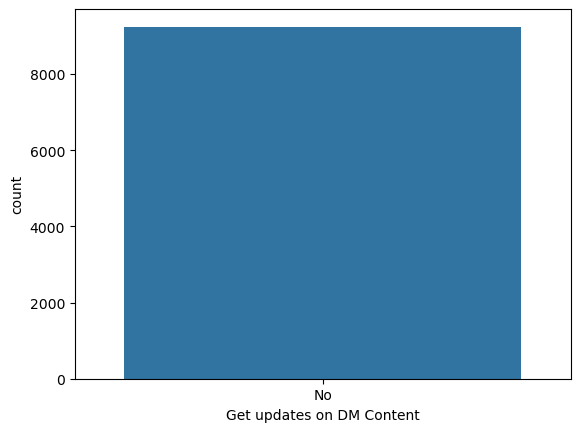

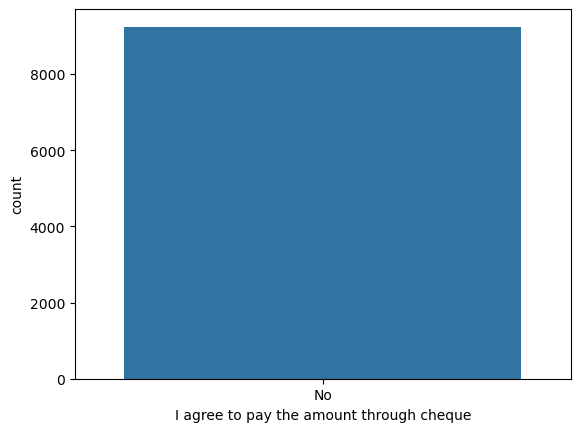

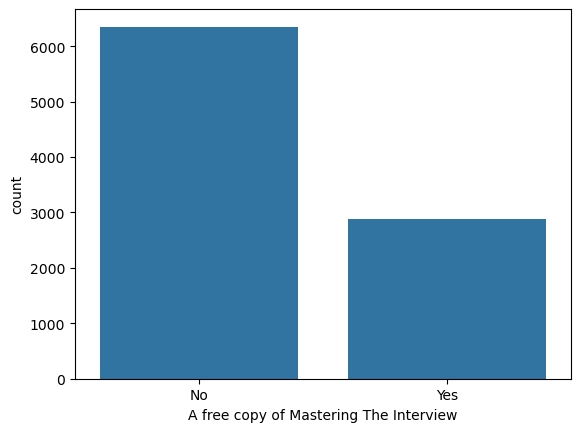

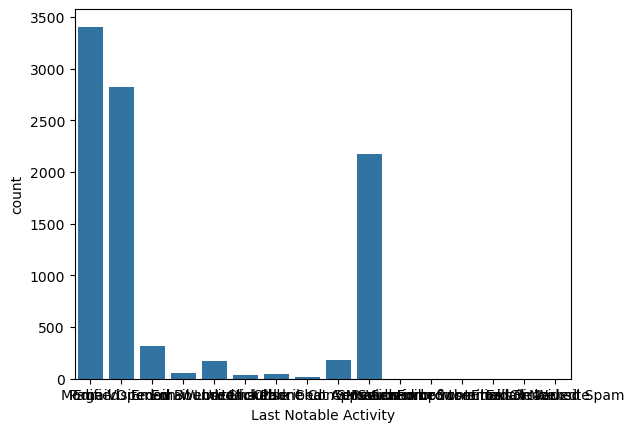

In [39]:
for i in cat_cols:
    sns.countplot(x=df[i])
    plt.show()

### Bivariate Analysis

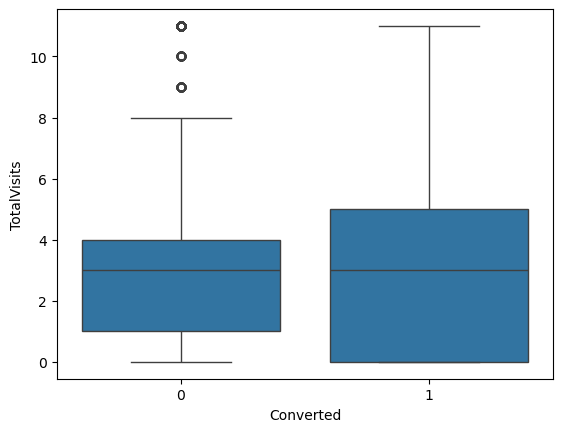

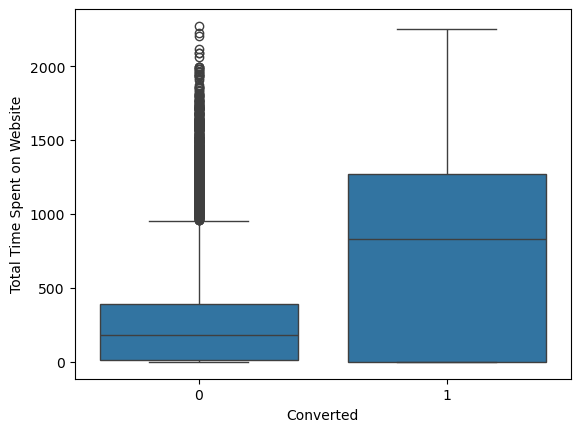

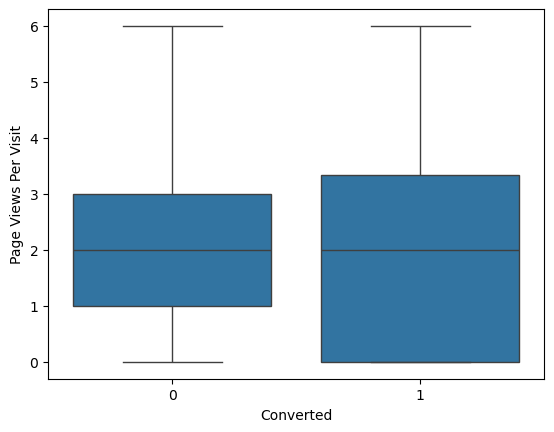

In [41]:
# Numerical
for i in num_cols:
    sns.boxplot(x=df['Converted'], y=df[i])
    plt.show()

In [42]:
### Multivariate Analysis

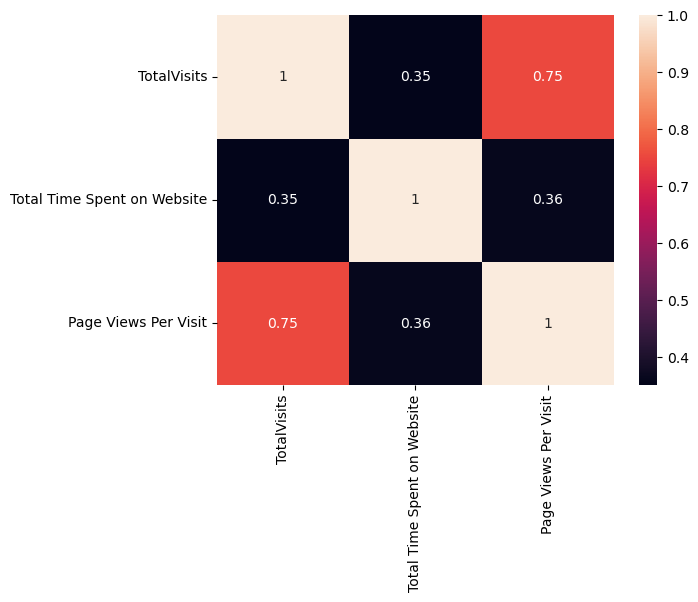

In [43]:
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

In [44]:
### Step 4: Preprocessing

## Convert Binary Variables (Yes/ No) to (0/ 1)

In [46]:
varList = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# define mapping function
def binary_map(x):
    return x.map({'Yes': 1, 'No':0})

# apply mapping function to binary vars in df
df[varList] = df[varList].apply(binary_map)

In [47]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,0,0,Modified
1,API,Organic Search,0,0,0,5.0,674.0,2.5,Email Opened,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,0,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,0,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,0,0,Modified
4,Landing Page Submission,Google,0,0,1,2.0,1428.0,1.0,Converted to Lead,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,0,0,Modified


## Categorical Variables with multiple levels - create Dummy Features (one-hot encoding)
Lead Origin, Lead Source, Last Activity, Specialization, What is your current occupation, What matters most to you in choosing a course, Tags, Last Notable Activity

In [49]:
dummy1 = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Tags']], drop_first=True, dtype=int )
df = pd.concat([df,dummy1], axis=1)

In [50]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given
0,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,0,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674.0,2.5,Email Opened,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,0,1,Email Opened,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,Landing Page Submiss

In [51]:
df.shape

(9240, 108)

## Add dummies for more columns and drop the 'Other' value

In [53]:
co = pd.get_dummies(df['What is your current occupation'], prefix='CurOccu', dtype=int )
co1 = co.drop(['CurOccu_Other'], axis=1)
df = pd.concat([df,co1], axis=1)


In [54]:
mm = pd.get_dummies(df['What matters most to you in choosing a course'], prefix='MattersMost', dtype=int )
mm1 = mm.drop(['MattersMost_Other'], axis=1)
print(mm1.columns)


Index(['MattersMost_Better Career Prospects', 'MattersMost_Flexibility & Convenience'], dtype='object')


In [55]:
df = pd.concat([df,mm1], axis=1)

In [56]:
df.shape

(9240, 115)

In [57]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,CurOccu_Businessman,CurOccu_Housewife,CurOccu_Student,CurOccu_Unemployed,CurOccu_Working Professional,MattersMost_Better Career Prospects,MattersMost_Flexibility & Convenience
0,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,0,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,API,Organic Search,0,0,0,5.0,674.0,2.5,Email Opened,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0

In [58]:
na = pd.get_dummies(df['Last Notable Activity'], dtype=int, prefix='LastNotAct' )
print(na.columns)
na1 = na.drop(['LastNotAct_Unreachable'], axis=1)
df = pd.concat([df,na1], axis=1)

Index(['LastNotAct_Approached upfront', 'LastNotAct_Email Bounced',
       'LastNotAct_Email Link Clicked', 'LastNotAct_Email Marked Spam',
       'LastNotAct_Email Opened', 'LastNotAct_Email Received',
       'LastNotAct_Form Submitted on Website',
       'LastNotAct_Had a Phone Conversation', 'LastNotAct_Modified',
       'LastNotAct_Olark Chat Conversation',
       'LastNotAct_Page Visited on Website',
       'LastNotAct_Resubscribed to emails', 'LastNotAct_SMS Sent',
       'LastNotAct_Unreachable', 'LastNotAct_Unsubscribed',
       'LastNotAct_View in browser link Clicked'],
      dtype='object')


In [59]:
df.shape

(9240, 130)

In [60]:
df.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,CurOccu_Businessman,CurOccu_Housewife,CurOccu_Student,CurOccu_Unemployed,CurOccu_Working Professional,MattersMost_Better Career Prospects,MattersMost_Flexibility & Convenience,LastNotAct_Approached upfront,LastNotAct_Email Bounced,LastNotAct_Email Link Clicked,LastNotAct_Email Marked Spam,LastNotAct_Email Opened,LastNotAct_Email Received,LastNotAct_Form Submitted on Website,LastNotAct_Had a Phone Conversation,LastNotAct_Modified,LastNotAct_Olark Chat Conversation,LastNotAct_Page Visited on Website,LastNotAct_Resubscribed to emails,LastNotAct_SMS Sent,LastNotAct_Unsubscribed,LastNotAct_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0.0,0.0,Page Visited on Website,Finance Management,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,0,0,Modified,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674.0,2.5,E

# Drop Original variables for which dummies are created

In [62]:
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','Tags','What is your current occupation', 'What matters most to you in choosing a course','Last Notable Activity'], axis=1)

In [63]:
df.shape

(9240, 122)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Columns: 122 entries, Do Not Email to LastNotAct_View in browser link Clicked
dtypes: float64(3), int32(104), int64(15)
memory usage: 4.9 MB


## Check Lead conversion rate from the data

In [66]:
lead = (sum(df['Converted'])/ len(df['Converted'].index))*100
lead

38.53896103896104

## Current Lead Conversion Rate is 38.53%

In [68]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,CurOccu_Businessman,CurOccu_Housewife,CurOccu_Student,CurOccu_Unemployed,CurOccu_Working Professional,MattersMost_Better Career Prospects,MattersMost_Flexibility & Convenience,LastNotAct_Approached upfront,LastNotAct_Email Bounced,LastNotAct_Email Link Clicked,LastNotAct_Email Marked Spam,LastNotAct_Email Opened,LastNotAct_Email Received,LastNotAct_Form Submitted on Website,LastNotAct_Had a Phone Conversation,LastNotAct_Modified,LastNotAct_Olark Chat Conversation,LastNotAct_Page Visited on Website,LastNotAct_Resubscribed to emails,LastNotAct_SMS Sent,LastNotAct_Unsubscribed,LastNotAct_View in browser link Clicked
0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674.0,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532.0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0

### Step 5: Model Building

In [70]:
X = df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,CurOccu_Businessman,CurOccu_Housewife,CurOccu_Student,CurOccu_Unemployed,CurOccu_Working Professional,MattersMost_Better Career Prospects,MattersMost_Flexibility & Convenience,LastNotAct_Approached upfront,LastNotAct_Email Bounced,LastNotAct_Email Link Clicked,LastNotAct_Email Marked Spam,LastNotAct_Email Opened,LastNotAct_Email Received,LastNotAct_Form Submitted on Website,LastNotAct_Had a Phone Conversation,LastNotAct_Modified,LastNotAct_Olark Chat Conversation,LastNotAct_Page Visited on Website,LastNotAct_Resubscribed to emails,LastNotAct_SMS Sent,LastNotAct_Unsubscribed,LastNotAct_View in browser link Clicked
0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674.0,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532.0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [71]:
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [72]:

## Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)


In [73]:
print("Train X shape: ", X_train.shape)
print("Test X shape: ", X_test.shape)
print("Train y shape: ", y_train.shape)
print("Test y shape: ", y_test.shape)

Train X shape:  (7392, 121)
Test X shape:  (1848, 121)
Train y shape:  (7392,)
Test y shape:  (1848,)


In [74]:
df.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,CurOccu_Businessman,CurOccu_Housewife,CurOccu_Student,CurOccu_Unemployed,CurOccu_Working Professional,MattersMost_Better Career Prospects,MattersMost_Flexibility & Convenience,LastNotAct_Approached upfront,LastNotAct_Email Bounced,LastNotAct_Email Link Clicked,LastNotAct_Email Marked Spam,LastNotAct_Email Opened,LastNotAct_Email Received,LastNotAct_Form Submitted on Website,LastNotAct_Had a Phone Conversation,LastNotAct_Modified,LastNotAct_Olark Chat Conversation,LastNotAct_Page Visited on Website,LastNotAct_Resubscribed to emails,LastNotAct_SMS Sent,LastNotAct_Unsubscribed,LastNotAct_View in browser link Clicked
0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,5.0,674.0,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532.0,2.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0

### Feature Scaling

In [76]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

num_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Graduation in progress,Tags_In confusion whether part time or DLP,Tags_Interested in full time MBA,Tags_Interested in Next batch,Tags_Interested in other courses,Tags_Lateral student,Tags_Lost to EINS,Tags_Lost to Others,Tags_Not doing further education,Tags_Recognition issue (DEC approval),Tags_Ringing,Tags_Shall take in the next coming month,Tags_Still Thinking,Tags_University not recognized,Tags_Want to take admission but has financial problems,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_number not provided,Tags_opp hangup,Tags_switched off,Tags_wrong number given,CurOccu_Businessman,CurOccu_Housewife,CurOccu_Student,CurOccu_Unemployed,CurOccu_Working Professional,MattersMost_Better Career Prospects,MattersMost_Flexibility & Convenience,LastNotAct_Approached upfront,LastNotAct_Email Bounced,LastNotAct_Email Link Clicked,LastNotAct_Email Marked Spam,LastNotAct_Email Opened,LastNotAct_Email Received,LastNotAct_Form Submitted on Website,LastNotAct_Had a Phone Conversation,LastNotAct_Modified,LastNotAct_Olark Chat Conversation,LastNotAct_Page Visited on Website,LastNotAct_Resubscribed to emails,LastNotAct_SMS Sent,LastNotAct_Unsubscribed,LastNotAct_View in browser link Clicked
7263,0,0,-1.126969,-0.884942,-1.269135,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6468,0,0,-0.428185,-0.632201,-0.143438,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
7833,0,0,-0.428185,-0.740257,-0.143438,0,0,0,0,0,0

In [77]:
### Stats Model for looking into data stats

In [78]:
import statsmodels.api as sm

lm = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
lm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7279
Model Family:                Binomial   Df Model:                          112
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1837.7
Date:                Mon, 17 Feb 2025   Deviance:                       3675.5
Time:                        22:39:22   Pearson chi2:                 1.75e+04
No. Iterations:                    36   Pseudo R-squ. (CS):             0.5655
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const                                                    -35.3770   6.84e+07  -5.17e-07      1.000   -1.34e+08    1.34e+08
Do Not Email                                              -1.1813      0.256     -4.621      0.000      -1.682      -0.680
Do Not Call                                               53.6122   4.75e+07   1.13e-06      1.000    -9.3e+07     9.3e+07
TotalVisits                                                0.2590      0.069      3.759      0.000       0.124       0.394
Total Time Spent on Website                                1.1476      0.051     22.317      0.000       1.047       1.248
Page Views Per Visit                                      -0.2400      0.076     -3.178      0.001      -0.388      -0.092
Search                                                     0.1198      1.247      0.096      0.923      -2.325       2.565
Magazine                                                -2.94e-06      6.573  -4.47e-07      1.000     -12.883      12.883
Newspaper Article                                         32.4323   4.31e+06   7.53e-06      1.000   -8.44e+06    8.44e+06
X Education Forums                                       -70.0654   6.39e+07   -1.1e-06      1.000   -1.25e+08    1.25e+08
Newspaper                                               -118.6902   6.71e+07  -1.77e-06      1.000   -1.32e+08    1.32e+08
Digital Advertisement                                      0.6270      1.659      0.378      0.705      -2.624       3.878
Through Recommendations                                    2.7113      4.891      0.554      0.579      -6.875      12.298
Receive More Updates About Our Courses                  6.889e-06      4.921    1.4e-06      1.000      -9.645       9.645
Update me on Supply Chain Content                      -9.683e-06      4.287  -2.26e-06      1.000      -8.403       8.403
Get updates on DM Content                               5.392e-06      3.937   1.37e-06      1.000      -7.716       7.716
I agree to pay the amount through cheque                5.357e-06      4.601   1.16e-06      1.000      -9.018       9.018
A free copy of Mastering The Interview                    -0.1686      0.139     -1.214      0.225      -0.441       0.104
Lead Origin_Landing Page Submission                       -0.4400      0.146     -3.020      0.003      -0.726      -0.154
Lead Origin_Lead Add Form                                  2.9855      0.685      4.359      0.000       1.643       4.328
Lead Origin_Lead Import                                   35.4906   9.65e+06   3.68e-06      1.000   -1.89e+07    1.89e+07
Lead Origin_Quick Add Form                                20.2402   1.97e+04      0.001      0.999   -3.86e+04    3.86e+04
Lead Sou

### RFE for Automated feature selection technique 

In [80]:
# Creating model
lm = LogisticRegression()

# fit
lm.fit(X_train, y_train)

# Running RFE with top 20 features
rfe = RFE(lm, n_features_to_select=20)

rfe = rfe.fit(X_train, y_train)

In [81]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 58),
 ('TotalVisits', False, 48),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 49),
 ('Search', False, 64),
 ('Magazine', False, 98),
 ('Newspaper Article', False, 37),
 ('X Education Forums', False, 44),
 ('Newspaper', False, 82),
 ('Digital Advertisement', False, 75),
 ('Through Recommendations', False, 93),
 ('Receive More Updates About Our Courses', False, 100),
 ('Update me on Supply Chain Content', False, 96),
 ('Get updates on DM Content', False, 97),
 ('I agree to pay the amount through cheque', False, 99),
 ('A free copy of Mastering The Interview', False, 52),
 ('Lead Origin_Landing Page Submission', False, 21),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 42),
 ('Lead Origin_Quick Add Form', False, 43),
 ('Lead Source_Direct Traffic', False, 61),
 ('Lead Source_Facebook', False, 51),
 ('Lead Source_Google', False, 66),
 ('Lead Source_Live Chat', False, 84),
 ('L

### These are the top 20 variables selected by RFE

In [83]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Diploma holder (Not Eligible)', 'Tags_Interested in Next batch',
       'Tags_Lateral student', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_in touch with EINS',
       'Tags_invalid number', 'Tags_switched off', 'Tags_wrong number given',
       'CurOccu_Unemployed', 'CurOccu_Working Professional',
       'LastNotAct_Had a Phone Conversation', 'LastNotAct_SMS Sent'],
      dtype='object')

### Assessing model using Statsmodel for detailed statistics

In [85]:
X_train_rfe = X_train[col]

In [86]:
# adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.head()

,const,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in Next batch,Tags_Lateral student,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_in touch with EINS,Tags_invalid number,Tags_switched off,Tags_wrong number given,CurOccu_Unemployed,CurOccu_Working Professional,LastNotAct_Had a Phone Conversation,LastNotAct_SMS Sent
7263,1.0,0,-0.884942,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6468,1.0,0,-0.632201,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
7833,1.0,0,-0.740257,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4461,1.0,0,2.006923,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1
8453,1.0,0,-0.884942,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [87]:
lm2 = sm.GLM(y_train, X_train_rfe, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7371
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2034.4
Date:                Mon, 17 Feb 2025   Deviance:                       4068.9
Time:                        22:39:33   Pearson chi2:                 1.30e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5417
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8981      0.326     -8.899      0.000      -3.536      -2.260
Do Not Email                                -1.5317      0.178     -8.592      0.000      -1.881      -1.182
Total Time Spent on Website                  1.0588      0.042     25.219      0.000       0.976       1.141
Lead Origin_Lead Add Form                    3.1336      0.231     13.536      0.000       2.680       3.587
Lead Source_Welingak Website                 1.6615      0.765      2.172      0.030       0.162       3.161
Tags_Busy                                    2.9414      0.302      9.751      0.000       2.350       3.533
Tags_Closed by Horizzon                      8.9218      1.033      8.635      0.000       6.897      10.947
Tags_Diploma holder (Not Eligible)         -22.0736   2.52e+04     -0.001      0.999   -4.94e+04    4.93e+04
Tags_Interested in Next batch               26.4931   8.31e+04      0.000      1.000   -1.63e+05    1.63e+05
Tags_Lateral student                        29.6070   1.01e+05      0.000      1.000   -1.97e+05    1.97e+05
Tags_Lost to EINS                            7.8716      0.631     12.482      0.000       6.636       9.108
Tags_Ringing                                -1.4041      0.310     -4.524      0.000      -2.012      -0.796
Tags_Will revert after reading the email     3.5614      0.215     16.574      0.000       3.140       3.983
Tags_in touch with EINS                      3.4550      0.827      4.179      0.000       1.834       5.076
Tags_invalid number                         -1.9499      1.166     -1.672      0.095      -4.236       0.336
Tags_switched off                           -1.3577      0.568     -2.391      0.017      -2.471      -0.245
Tags_wrong number given                    -22.6026   2.96e+04     -0.001      0.999   -5.81e+04     5.8e+04
CurOccu_Unemployed                          -1.4784      0.297     -4.974      0.000      -2.061      -0.896
CurOccu_Working Professional                 1.3346      0.367      3.638      0.000       0.616       2.054
LastNotAct_Had a Phone Conversation          4.1182      1.367      3.012      0.003       1.438       6.798
LastNotAct_SMS Sent                          2.6957      0.112     24.167      0.000       2.477       2.914
============================================================================================================
"""

### We can drop variable 'Tags_Diploma holder (Not Eligible)' and 'Tags_wrong number given' as p-value is very high 0.999 coef is also highest

In [89]:
X = X_train_rfe.drop(['Tags_Diploma holder (Not Eligible)' , 'Tags_wrong number given'], axis = 1)

In [90]:
# create another model without this variable
X_train_sm = sm.add_constant(X)

lr = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lr_model = lr.fit()
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7373
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.3
Date:                Mon, 17 Feb 2025   Deviance:                       4076.6
Time:                        22:39:33   Pearson chi2:                 1.32e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.5413
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9969      0.330     -9.074      0.000      -3.644      -2.350
Do Not Email                                -1.5334      0.178     -8.612      0.000      -1.882      -1.184
Total Time Spent on Website                  1.0571      0.042     25.206      0.000       0.975       1.139
Lead Origin_Lead Add Form                    3.1409      0.232     13.541      0.000       2.686       3.596
Lead Source_Welingak Website                 1.6531      0.765      2.161      0.031       0.154       3.152
Tags_Busy                                    3.0878      0.300     10.286      0.000       2.499       3.676
Tags_Closed by Horizzon                      9.0614      1.033      8.772      0.000       7.037      11.086
Tags_Interested in Next batch               23.6466   1.85e+04      0.001      0.999   -3.63e+04    3.64e+04
Tags_Lateral student                        26.7472   2.25e+04      0.001      0.999    -4.4e+04    4.41e+04
Tags_Lost to EINS                            8.0113      0.630     12.708      0.000       6.776       9.247
Tags_Ringing                                -1.2537      0.308     -4.067      0.000      -1.858      -0.649
Tags_Will revert after reading the email     3.7032      0.214     17.323      0.000       3.284       4.122
Tags_in touch with EINS                      3.5952      0.826      4.350      0.000       1.975       5.215
Tags_invalid number                         -1.7969      1.165     -1.543      0.123      -4.080       0.486
Tags_switched off                           -1.2080      0.567     -2.131      0.033      -2.319      -0.097
CurOccu_Unemployed                          -1.5202      0.301     -5.055      0.000      -2.110      -0.931
CurOccu_Working Professional                 1.2823      0.368      3.481      0.001       0.560       2.004
LastNotAct_Had a Phone Conversation          4.1755      1.396      2.990      0.003       1.439       6.912
LastNotAct_SMS Sent                          2.6843      0.111     24.202      0.000       2.467       2.902
============================================================================================================
"""

### We can drop variable 'Tags_Interested in Next batch' and 'Tags_Lateral student' as p-value is very high 0.999 and coef is also highest

In [92]:
X = X.drop(['Tags_Interested in Next batch' , 'Tags_Lateral student'], axis = 1)

In [93]:
# create another model without this variable
X_train_sm = sm.add_constant(X)

lr = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7375
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2053.0
Date:                Mon, 17 Feb 2025   Deviance:                       4105.9
Time:                        22:39:33   Pearson chi2:                 1.32e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5394
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.8698      0.319     -8.995      0.000      -3.495      -2.245
Do Not Email                                -1.5112      0.177     -8.547      0.000      -1.858      -1.165
Total Time Spent on Website                  1.0555      0.042     25.312      0.000       0.974       1.137
Lead Origin_Lead Add Form                    3.1646      0.230     13.733      0.000       2.713       3.616
Lead Source_Welingak Website                 1.6246      0.764      2.125      0.034       0.126       3.123
Tags_Busy                                    2.8918      0.288     10.024      0.000       2.326       3.457
Tags_Closed by Horizzon                      8.8729      1.030      8.617      0.000       6.855      10.891
Tags_Lost to EINS                            7.8252      0.625     12.520      0.000       6.600       9.050
Tags_Ringing                                -1.4586      0.296     -4.924      0.000      -2.039      -0.878
Tags_Will revert after reading the email     3.5147      0.197     17.807      0.000       3.128       3.902
Tags_in touch with EINS                      3.4087      0.822      4.144      0.000       1.797       5.021
Tags_invalid number                         -1.9992      1.161     -1.721      0.085      -4.276       0.277
Tags_switched off                           -1.4068      0.561     -2.510      0.012      -2.506      -0.308
CurOccu_Unemployed                          -1.4617      0.295     -4.955      0.000      -2.040      -0.884
CurOccu_Working Professional                 1.3049      0.362      3.601      0.000       0.595       2.015
LastNotAct_Had a Phone Conversation          4.0993      1.358      3.020      0.003       1.439       6.760
LastNotAct_SMS Sent                          2.7042      0.111     24.446      0.000       2.487       2.921
============================================================================================================
"""

### We can drop variable 'Tags_invalid number' as p-value > 0.05

In [95]:
X = X.drop(['Tags_invalid number'], axis = 1)

In [96]:
# create another model without this variable
X_train_sm = sm.add_constant(X)

lr = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7376
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2055.2
Date:                Mon, 17 Feb 2025   Deviance:                       4110.5
Time:                        22:39:34   Pearson chi2:                 1.33e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5391
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -2.9417      0.322     -9.142      0.000      -3.572      -2.311
Do Not Email                                -1.5095      0.177     -8.540      0.000      -1.856      -1.163
Total Time Spent on Website                  1.0553      0.042     25.302      0.000       0.974       1.137
Lead Origin_Lead Add Form                    3.1721      0.231     13.745      0.000       2.720       3.624
Lead Source_Welingak Website                 1.6170      0.764      2.115      0.034       0.119       3.115
Tags_Busy                                    3.0043      0.286     10.516      0.000       2.444       3.564
Tags_Closed by Horizzon                      8.9740      1.029      8.719      0.000       6.957      10.991
Tags_Lost to EINS                            7.9270      0.624     12.695      0.000       6.703       9.151
Tags_Ringing                                -1.3393      0.293     -4.576      0.000      -1.913      -0.766
Tags_Will revert after reading the email     3.6188      0.195     18.558      0.000       3.237       4.001
Tags_in touch with EINS                      3.5113      0.822      4.273      0.000       1.901       5.122
Tags_switched off                           -1.2887      0.559     -2.307      0.021      -2.384      -0.194
CurOccu_Unemployed                          -1.4920      0.297     -5.016      0.000      -2.075      -0.909
CurOccu_Working Professional                 1.2926      0.366      3.536      0.000       0.576       2.009
LastNotAct_Had a Phone Conversation          4.1405      1.378      3.004      0.003       1.439       6.842
LastNotAct_SMS Sent                          2.6826      0.110     24.490      0.000       2.468       2.897
============================================================================================================
"""

### P-values look good for all features.
Lets check VIF

In [98]:
X = X.drop(['const'], axis = 1)

In [99]:
# Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
11,CurOccu_Unemployed,5.30
8,Tags_Will revert after reading the email,4.47
7,Tags_Ringing,1.80
2,Lead Origin_Lead Add Form,1.64
12,CurOccu_Working Professional,1.58
14,LastNotAct_SMS Sent,1.51
5,Tags_Closed by Horizzon,1.45
3,Lead Source_Welingak Website,1.25
10,Tags_switched off,1.17
4,Tags_Busy,1.14


### Drop feature 'CurOccu_Unemployed' sice the VIF > 5 which indicates its high correlationship with other feature

In [101]:
X = X.drop(['CurOccu_Unemployed'], axis = 1)

In [102]:
# create another model without this variable
X_train_sm = sm.add_constant(X)

lr = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7392
Model:                            GLM   Df Residuals:                     7377
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2068.2
Date:                Mon, 17 Feb 2025   Deviance:                       4136.3
Time:                        22:39:35   Pearson chi2:                 1.31e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5375
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.3165      0.192    -22.471      0.000      -4.693      -3.940
Do Not Email                                -1.4856      0.176     -8.425      0.000      -1.831      -1.140
Total Time Spent on Website                  1.0599      0.042     25.439      0.000       0.978       1.142
Lead Origin_Lead Add Form                    3.2286      0.228     14.183      0.000       2.782       3.675
Lead Source_Welingak Website                 1.5346      0.763      2.011      0.044       0.039       3.030
Tags_Busy                                    2.9001      0.283     10.233      0.000       2.345       3.456
Tags_Closed by Horizzon                      8.8693      1.028      8.624      0.000       6.853      10.885
Tags_Lost to EINS                            7.8373      0.624     12.568      0.000       6.615       9.060
Tags_Ringing                                -1.4544      0.291     -4.997      0.000      -2.025      -0.884
Tags_Will revert after reading the email     3.5283      0.193     18.283      0.000       3.150       3.907
Tags_in touch with EINS                      3.3958      0.821      4.135      0.000       1.786       5.005
Tags_switched off                           -1.3706      0.559     -2.454      0.014      -2.465      -0.276
CurOccu_Working Professional                 2.7382      0.226     12.109      0.000       2.295       3.181
LastNotAct_Had a Phone Conversation          4.0782      1.360      2.998      0.003       1.412       6.744
LastNotAct_SMS Sent                          2.6671      0.109     24.444      0.000       2.453       2.881
============================================================================================================
"""

### P-values are still good for all features.
Lets check VIF

In [104]:

# Checking VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.63
13,LastNotAct_SMS Sent,1.50
8,Tags_Will revert after reading the email,1.42
3,Lead Source_Welingak Website,1.25
5,Tags_Closed by Horizzon,1.22
11,CurOccu_Working Professional,1.20
7,Tags_Ringing,1.10
1,Total Time Spent on Website,1.09
0,Do Not Email,1.06
4,Tags_Busy,1.03


### At this point, the p_values < 0.05 and the VIF is < 5 for all features

### Step 6: Predict on Test set and evaluating the model

In [106]:
# Compute predicted values (Probability of getting a 1 i.e Lead Converted into actual customer)
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred[:10]

7263    0.973785
6468    0.089525
7833    0.614478
4461    0.273566
8453    0.151092
7094    0.999281
7932    0.005197
449     0.999770
5382    0.745549
3768    0.151092
dtype: float64

### Classify into Hot Lead and Cold Lead depending upon a cut-off of say 0.5 probability
Leads having probability > 0.5 == Hot Leads (1)                                            
Leads having probability < 0.5 == Cold Leads (0)

In [108]:
y_train_pred_final = pd.DataFrame({'HotLead':y_train.values, 'HotLead_Prob': y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,HotLead,HotLead_Prob,Lead Number
7263,1,0.973785,7263
6468,0,0.089525,6468
7833,1,0.614478,7833
4461,0,0.273566,4461
8453,0,0.151092,8453


In [110]:
y_train_pred_final['HotLead_Predicted'] = y_train_pred_final.HotLead_Prob.map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head()

,HotLead,HotLead_Prob,Lead Number,HotLead_Predicted
7263,1,0.973785,7263,1
6468,0,0.089525,6468,0
7833,1,0.614478,7833,1
4461,0,0.273566,4461,0
8453,0,0.151092,8453,0


## Assess the Model

In [112]:
from sklearn import metrics

In [114]:
confusion = metrics.confusion_matrix(y_train_pred_final.HotLead, y_train_pred_final.HotLead_Predicted)
print(confusion)

[[4249  314]
 [ 459 2370]]


# Confusion Matrix
# **********************************************************
# Predicted             Not Converted           Converted
# Actual
# Not Converted           4249 (TN)               314 (FP)
# Converted                459 (FN)              2370 (TP)     

In [116]:
# Print Accuracy
print(metrics.accuracy_score(y_train_pred_final.HotLead, y_train_pred_final.HotLead_Predicted))

0.8954274891774892


## Accuracy = 89%

In [118]:
print(metrics.recall_score(y_train_pred_final.HotLead, y_train_pred_final.HotLead_Predicted))

0.8377518557794273


## Recall = 83% . The module is efficently predicting the Hot and Cold Leads.

In [142]:
lr_model.params[1:]

Do Not Email                               -1.485566
Total Time Spent on Website                 1.059895
Lead Origin_Lead Add Form                   3.228593
Lead Source_Welingak Website                1.534553
Tags_Busy                                   2.900150
Tags_Closed by Horizzon                     8.869254
Tags_Lost to EINS                           7.837317
Tags_Ringing                               -1.454352
Tags_Will revert after reading the email    3.528348
Tags_in touch with EINS                     3.395825
Tags_switched off                          -1.370597
CurOccu_Working Professional                2.738171
LastNotAct_Had a Phone Conversation         4.078163
LastNotAct_SMS Sent                         2.667087
dtype: float64

In [140]:
# Get the coefficients
coefficients = lr_model.params[1:]  # Exclude the intercept

# Create a DataFrame for better visualization
coefficients_df = pd.DataFrame({
    'feature': X.columns[0:], 
    'coefficient': coefficients
})

# Compute the absolute values of the coefficients
coefficients_df['abs_coefficient'] = np.abs(coefficients_df['coefficient'])

# Sort by absolute coefficient
coefficients_df = coefficients_df.sort_values(by='abs_coefficient', ascending=False)

# Display top 3 features
top_features = coefficients_df.head(3)
print(top_features)

                                                                 feature  \
Tags_Closed by Horizzon                          Tags_Closed by Horizzon   
Tags_Lost to EINS                                      Tags_Lost to EINS   
LastNotAct_Had a Phone Conversation  LastNotAct_Had a Phone Conversation   

                                     coefficient  abs_coefficient  
Tags_Closed by Horizzon                 8.869254         8.869254  
Tags_Lost to EINS                       7.837317         7.837317  
LastNotAct_Had a Phone Conversation     4.078163         4.078163  


## Top 3 feature
                                              coefficient  abs_coefficient  
Tags_Closed by Horizzon                        8.869254         8.869254  
Tags_Lost to EINS                              7.837317         7.837317  
LastableNotionAct_Had a Phone Conversation     4.078163         4.078163 